# Term Deposit Marketing

## 1. Explorative Data Analysis

### 1.1. Data Import

In [1]:
import pandas as pd

marketing = pd.read_csv('term-deposit-marketing-2020.csv')

### 1.2. Data Description

In [2]:
marketing.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


There are 14 variables in this dataset. This includes target variable y showing whether the client subscribed to a term deposit. Rest 13 variables show the client’s personal information and other relevant information.  
  
Data in this dataset are of two types.
1.	Continuous data: age, balance, duration, campaign
2.	District or Categorical data: job, marital, education, default, housing, loan, contact, day, month

### 1.3. Statistical Summary

In [3]:
marketing[["age","balance","duration","campaign"]].describe()

,age,balance,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,254.824300,2.882175
std,9.641776,2903.769716,259.366498,3.239051
min,19.000000,-8019.000000,0.000000,1.000000
25%,33.000000,54.000000,100.000000,1.000000
50%,39.000000,407.000000,175.000000,2.000000
75%,48.000000,1319.000000,313.000000,3.000000
max,95.000000,102127.000000,4918.000000,63.000000


The above table shows the statistical summary for continuous variables.  
  
In this dataset, the mean age of the client is 40.54 years with 9.64 years of deviation. The age of clients lies between 19 and 95. Similar information is also available about the client’s balance, last contact duration and the number of contacts performed during the campaign.

### 1.4. Data Distribution

After seeing the statistical summary subsequent 4 graphs show histograms of the same. 

<AxesSubplot:xlabel='age', ylabel='Count'>

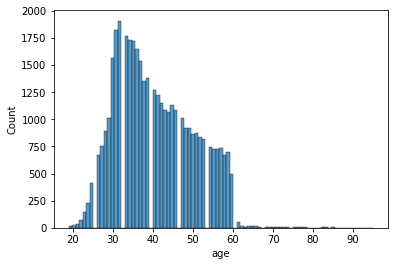

In [4]:
import seaborn as sns

sns.histplot(data=marketing,x="age")

<AxesSubplot:xlabel='balance', ylabel='Count'>

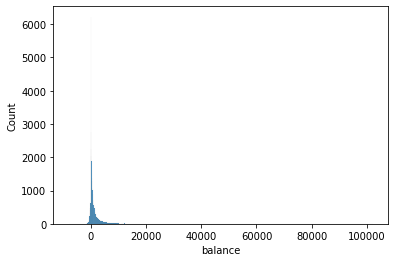

In [5]:
sns.histplot(data=marketing,x="balance")

<AxesSubplot:xlabel='duration', ylabel='Count'>

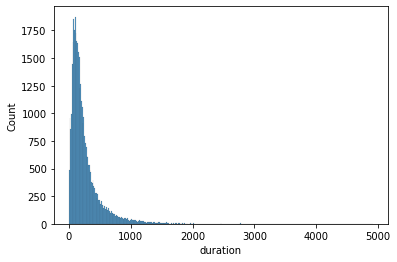

In [6]:
sns.histplot(data=marketing,x="duration")

<AxesSubplot:xlabel='campaign', ylabel='Count'>

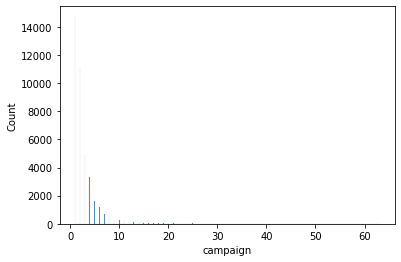

In [7]:
sns.histplot(data=marketing,x="campaign")

For categorical variables, the frequency of each category of variable has been shown in the following tables.  

In [8]:
pd.crosstab(index=marketing['job'],columns=marketing['y'])

y,no,yes
job,,
admin,4132,351
blue-collar,8848,535
entrepreneur,1317,88
housemaid,1034,53
management,7490,676
retired,1286,151
self-employed,1302,112
services,3672,238
student,442,82


In [9]:
pd.crosstab(index=marketing['marital'],columns=marketing['y'])

y,no,yes
marital,,
divorced,4334,391
married,22908,1478
single,9862,1027


In [10]:
pd.crosstab(index=marketing['education'],columns=marketing['y'])

y,no,yes
education,,
primary,5917,353
secondary,19575,1418
tertiary,10177,1029
unknown,1435,96


In [11]:
pd.crosstab(index=marketing['default'],columns=marketing['y'])

y,no,yes
default,,
no,36344,2847
yes,760,49


In [12]:
pd.crosstab(index=marketing['housing'],columns=marketing['y'])

y,no,yes
housing,,
no,14537,1432
yes,22567,1464


In [13]:
pd.crosstab(index=marketing['loan'],columns=marketing['y'])

y,no,yes
loan,,
no,30554,2516
yes,6550,380


In [14]:
pd.crosstab(index=marketing['contact'],columns=marketing['y'])

y,no,yes
contact,,
cellular,22681,2233
telephone,2155,166
unknown,12268,497


In [15]:
pd.crosstab(index=marketing['month'],columns=marketing['y'])

y,no,yes
month,,
apr,2267,451
aug,4927,288
dec,12,1
feb,2041,255
jan,1138,38
jul,5996,384
jun,4440,294
mar,133,125
may,12741,791


## 2. Data Preprocessing

### 2.1. Min Max Normalization

Values of continuous variables are transformed between 0 and 1 using the min-max normalization technique.

In [16]:
import numpy as np
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [17]:
Continuous_data = marketing[["age","balance","duration","campaign"]]
Continuous_data = NormalizeData(Continuous_data)

### 2.2. Binary Encoding

Using one hot encoder, categorical variables are transformed as a group of variables of value 0 or 1.

In [18]:
import category_encoders as ce

cat_data = marketing[["job","marital","education","default","housing","loan","contact","day","month"]]

encoder = ce.one_hot.OneHotEncoder(cols=["job","marital","education","default","housing","loan","contact","day","month"],return_df=True)

cat_data=encoder.fit_transform(cat_data) 

In [19]:
y=marketing["y"].map(dict(no=0, yes=1))

In [20]:
marketing_P = pd.DataFrame()
marketing_P = pd.concat([Continuous_data,cat_data,y],axis=1)
marketing_P

,age,balance,duration,campaign,job_1,job_2,job_3,job_4,job_5,job_6,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,y
0,0.513158,0.092259,0.053070,0.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.328947,0.073067,0.030704,0.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.184211,0.072822,0.015453,0.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.368421,0.086476,0.018707,0.000000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.184211,0.072812,0.040260,0.000000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.447368,0.076390,0.021757,0.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39996,0.144737,0.103127,0.048394,0.032258,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
39997,0.460526,0.074619,0.034567,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
39998,0.197368,0.082309,0.069540,0.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.3. Train Test Split

In [21]:
data = marketing_P.drop('y',axis=1)
target = marketing_P["y"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

### 2.4. ReSampling

The subsequent table and pie chart shows the distribution of the value of the target variable y. As there are more data points of clients who have not subscribed to term deposits than clients who have subscribed, data seems to be highly imbalanced.  
  
To deal with imbalanced data, train data are resampled which have the equal frequency of both target variables. To achieve this data points showing information about clients who have not subscribed are downsampled from 29679 to 16000. And data points of clients who have subscribed are upsampled from 2321 to 16000.


0    29692
1     2308
Name: y, dtype: int64


<AxesSubplot:ylabel='Type'>

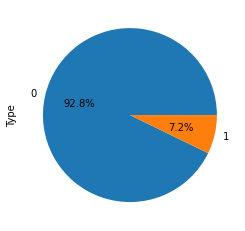

In [23]:
train = pd.concat([X_train,y_train],axis=1)

print(train['y'].value_counts())
train.groupby('y').size().plot(kind='pie',
                                       y = "y",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [24]:
client_not_sub = train[marketing_P["y"]==0]
client_sub = train[marketing_P["y"]==1]

print(client_not_sub.shape)
print(client_sub.shape)

(29692, 75)
(2308, 75)


C:\Users\patel\AppData\Local\Temp/ipykernel_14540/2487010572.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_not_sub = train[marketing_P["y"]==0]
C:\Users\patel\AppData\Local\Temp/ipykernel_14540/2487010572.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_sub = train[marketing_P["y"]==1]


In [25]:
import math
from sklearn.utils import resample
total_sample_len = len(train)
client_not_sub = resample(client_not_sub,
                             replace=True,
                             n_samples=math.ceil(total_sample_len*0.50),
                             random_state=42)

client_sub = resample(client_sub,
                             replace=True,
                             n_samples=math.ceil(total_sample_len*0.50),
                             random_state=42)

print(client_not_sub.shape)
print(client_sub.shape)


(16000, 75)
(16000, 75)


0    16000
1    16000
Name: y, dtype: int64


<AxesSubplot:ylabel='Type'>

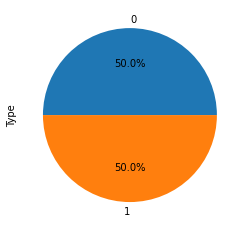

In [26]:
train_resampled = pd.concat([client_not_sub, client_sub],axis=0)
X_train = train.drop('y',axis=1)
y_train = train["y"]

print(train_resampled['y'].value_counts())
train_resampled.groupby('y').size().plot(kind='pie',
                                               y = "y",
                                               label = "Type",
                                               autopct='%1.1f%%')

## 3. Predictive Model

### 3.1. Best Model and Hyperparameter Selection

Using the GridSearchCV, the model’s hyperparameters has been selected such that accuracy is best. This technique has been performed for the random forest, logistic regression, and XGboost models.

In [27]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'XGBboost' : {
        'model' : XGBClassifier(),
        'params' : {
            'max_depth' : [2,13,30]
        }
    },
    'NeuralNetworks' : {
        'model' : MLPClassifier(),
        'params' : {
            'hidden_layer_sizes' :[(15,1),(5,2),(15,3)]
        }
    }
}

In [28]:
scores = []

from sklearn.model_selection import GridSearchCV

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, scoring='f1_macro', return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\patel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [29]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.680870,{'n_estimators': 5}
1,logistic_regression,0.677814,{'C': 10}
2,XGBboost,0.716760,{'max_depth': 13}
3,NeuralNetworks,0.737390,"{'hidden_layer_sizes': (15, 3)}"


Among 3 models, the neural networks model with the hidden layers size (15,1) has the highest accuracy score for 5 fold cross-validation.

### 3.2. Neural Network Model

In [30]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(15, 1), 
                      random_state=1)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

C:\Users\patel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
from sklearn.metrics import accuracy_score, classification_report
print('Train accuracy' ,accuracy_score(y_train,y_train_predict))
print('Test accuracy' ,accuracy_score(y_test,y_predict))

from sklearn.metrics import fbeta_score
print('Test F2' ,fbeta_score(y_test, y_predict, average='macro', beta=2))

print(classification_report(y_test,y_predict))
pd.crosstab(y_test,y_predict)

Train accuracy 0.9421875
Test accuracy 0.93525
Test F2 0.7792640755179787
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7412
           1       0.55      0.61      0.58       588

    accuracy                           0.94      8000
   macro avg       0.76      0.78      0.77      8000
weighted avg       0.94      0.94      0.94      8000



col_0,0,1
y,,
0,7125,287
1,231,357


In [32]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, data, target, cv=kfold)

In [33]:
print('Cross Validation Score' , cv_scores)
print('Average CV Score' , np.average(cv_scores))

Cross Validation Score [0.937    0.935125 0.935125 0.93525  0.928125]
Average CV Score 0.9341249999999999


### 3.2. SHAP Analysis

In [34]:
import shap
shap_sample_train = shap.sample(X_train, 100) 
shap_sample_test = shap.sample(X_test, 25) 

In [35]:
explainer = shap.KernelExplainer(model.predict, shap_sample_train)
shap_values_test = explainer.shap_values(shap_sample_test)

X does not have valid feature names, but MLPClassifier was fitted with feature names


  0%|          | 0/25 [00:00<?, ?it/s]

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
The default of 'normalize' will b

X does not have valid feature names, but MLPClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
The default of 'normalize' will b

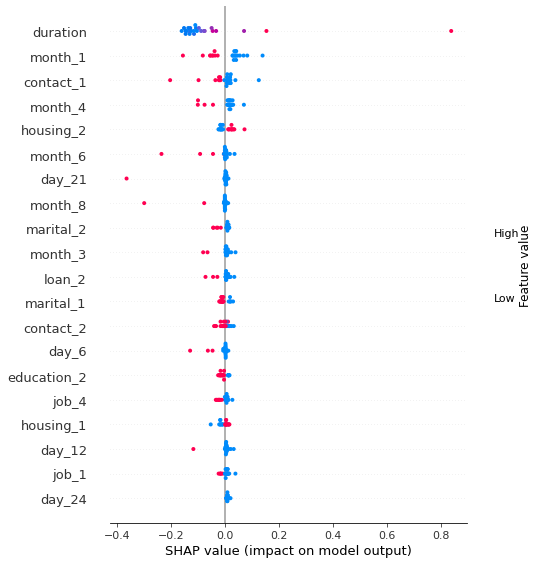

In [36]:
shap.summary_plot(shap_values_test,shap_sample_test)

SHAP analysis shows that last call duration is the most important variable for determining whether the client will subscribe to a term deposit. An increase in duration increases the chance of predicting that the client will subscribe to a term deposit.  
  
Other important variables are last contact month, contact communication type and housing.
